In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, learning_curve, GridSearchCV, ShuffleSplit, train_test_split, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier   
from numpy import mean, std
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc 
import seaborn as sns
import matplotlib.pyplot as plt

## 2 Class

In [2]:
df = pd.read_csv('C:/Users/norma/Desktop/BITIRME/(Mcisiz)GSE_OrtakData_NormR.csv', sep = ";", decimal=",")
print(df.shape)
df = df[df.Class != 2]
df.shape

(1262, 11619)


(949, 11619)

In [3]:
features = df.drop('Class',axis=1)
labels_dr = 'C:/Users/norma/Desktop/BITIRME/gse_less_feature.csv'
labels_df = pd.read_csv(labels_dr, sep = ',')
labels = labels_df.iloc[:949,:2]

## 3 Class

In [5]:
# df = pd.read_csv('C:/Users/norma/Desktop/BITIRME/(Mcisiz)GSE_OrtakData_NormR.csv', sep = ";", decimal=",")
# print(df.shape)

(1262, 11619)


In [6]:
# features = df.drop('Class',axis=1)
# labels_dr = 'C:/Users/norma/Desktop/BITIRME/gse_less_feature.csv'
# labels_df = pd.read_csv(labels_dr, sep = ',')
# labels = labels_df.iloc[:,:3]

### N COMPONENTS = 225

In [4]:
n_components = 225
pca = PCA(n_components = n_components).fit(features)
principalComponents = pca.fit_transform(features)
columns = ['Pc' + str(i) for i in range(1,n_components+1)]
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(principalDf, labels, test_size= 0.25, random_state=42)

In [6]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## List Hyperparameters to tune

In [10]:
# p=[1,2]

# optimal_p = 0
# best_acc = 0
# for i in p:
#     knn = KNeighborsClassifier(p = i)
#     knn.fit(x_train, y_train)
#     if best_acc < knn.score(x_test,y_test):
#         best_acc = knn.score(x_test,y_test)
#         optimal_p = i

# print("Optimal p: {}, Accuracy: {}".format(optimal_p,best_acc))


In [11]:
# optimal_weights = 'uniform'
# best_acc = 0
# weights = ['uniform', 'distance']
# for i in weights:
#     knn = KNeighborsClassifier(n_neighbors = 17, p = 2, weights = i)
#     knn.fit(x_train, y_train)
#     if best_acc < knn.score(x_test,y_test):
#         best_acc = knn.score(x_test,y_test)
#         optimal_weights = i

# print("Optimal Weights: {}, Accuracy: {}".format(optimal_weights,best_acc))


In [7]:
n_neighbors = list(range(1,60))

optimal_n_neighbors = 0
best_acc = 0
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    if best_acc < knn.score(x_test,y_test):
        best_acc = knn.score(x_test,y_test)
        optimal_n_neighbors = i

print("Optimal N-Neighbors: {}, Accuracy: {}".format(optimal_n_neighbors,best_acc))

Optimal N-Neighbors: 11, Accuracy: 0.6386554621848739


# Optimal K-NN Model

In [10]:
knn = KNeighborsClassifier(n_neighbors = 11, p = 2, weights = 'uniform')
knn.fit(x_train, y_train)
print("Accuracy: {}".format(knn.score(x_test,y_test)))
y_pred = knn.predict(x_test)

# # classification report for precision, recall f1-score and accuracy
# matrix = classification_report(y_test,y_pred,labels=[2,1,0])
# print('Classification report : \n',matrix)

# labels = ['MCI','AD','CTL']
# ax= plt.subplot()

# # confusion matrix
# matrix = confusion_matrix(
#     y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

# sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# # labels, title and ticks
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

Accuracy: 0.6386554621848739


In [8]:
from sklearn.preprocessing import OneHotEncoder
class_d = 'C:/Users/norma/Desktop/BITIRME/duzgun_GSE_OrtakData_NormR.csv'
class_df = pd.read_csv(class_d, sep = ';', decimal = ',')
class_df = class_df[class_df.Class != 2]

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(class_df[['Class']]).toarray())
encoder_df.columns = ['AD','CTL']

y_test_ = encoder.inverse_transform(y_test).ravel()

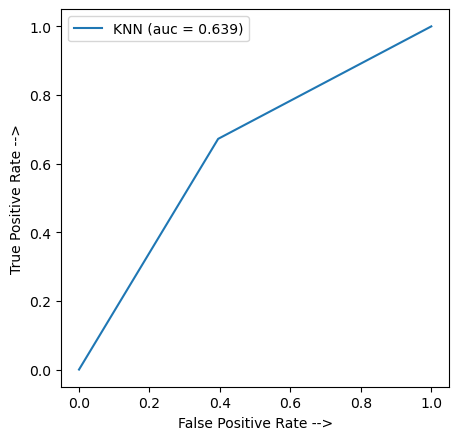

In [16]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test_, y_pred[:,1])
auc_knn = auc(fpr,tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, linestyle = '-', label = 'KNN (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()